# MILESTONE 2

## BAB 1 - Introduction

Nama : Nur M Assudais Alkharomain </br>
Batch : RMT-041

<center>Problem Statement</center>
Penyakit diabetes merupakan salah satu penyakit kronis yang jumlah penderitanya terus meningkat di Indonesia dan dapat menimbulkan komplikasi serius jika tidak ditangani dengan baik. Untuk membantu masyarakat dalam mengenali potensi risiko diabetes sejak dini, proyek ini bertujuan mengembangkan model machine learning yang mampu memprediksi apakah seseorang berisiko terkena diabetes berdasarkan data gaya hidup, kondisi kesehatan, dan status demografis. Model ini ditujukan untuk masyarakat umum yang ingin melakukan pengecekan mandiri terhadap risiko diabetes tanpa harus langsung ke fasilitas medis. Keberhasilan model akan diukur melalui metrik seperti akurasi, precision, recall, dan F1-score. Proyek ini akan menggunakan dataset BRFSS dan algoritma seperti KNN, SVM, Decision Tree, Random Forest, dan metode Boosting. Seluruh tahapan pengembangan direncanakan selesai pada tanggal 23 April 2024, mencakup proses eksplorasi data hingga evaluasi model dan deployment model.

<center>Objective</center>
Membuat model classification untuk memprediksi potensi risiko diabetes berdasarkan informasi gaya hidup, kondisi kesehatan, dan status demografis individu. Proyek ini juga bertujuan untuk membandingkan performa beberapa algoritma machine learning seperti K-Nearest Neighbors (KNN), Decision Tree, Random Forest, dan metode Boosting guna menemukan model terbaik dalam hal akurasi dan kemampuan deteksi kasus positif. Selain itu, sistem prediksi ini diharapkan dapat meningkatkan kesadaran masyarakat terhadap pentingnya deteksi dini penyakit diabetes dengan pendekatan berbasis data yang mudah diakses dan digunakan. Target kinerja model adalah nilai recall yang tinggi untuk meminimalkan kemungkinan kasus diabetes yang tidak terdeteksi. Seluruh proses direncanakan selesai pada tanggal 23 April 2024, mencakup tahapan eksplorasi data, preprocessing, pemodelan, evaluasi, dan deployment model.

## BAB 2 - Import Libraries

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import xgboost
import time
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats
from scipy.stats import pointbiserialr, spearmanr, chi2_contingency
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, make_scorer, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import joblib

## BAB 3 - Data Loading

In [2]:
#Load dataset dan tampilkan 10 baris teratas
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
#Menampilkan 10 baris data pertama
df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


| Column | Description |
|---|---|
| Diabetes_binary | 0 = no diabetes 1 = diabetes |
| HighBP | 0 = no high BP 1 = high BP |
| HighChol | 0 = no high cholesterol 1 = high cholesterol |
| CholCheck | 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years |
| BMI | Body Mass Index |
| Smoker | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes |
| Stroke | (Ever told) you had a stroke. 0 = no 1 = yes |
| HeartDiseaseorAttack | coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes |
| PhysActivity | physical activity in past 30 days - not including job 0 = no 1 = yes |
| Fruits | Consume Fruit 1 or more times per day 0 = no 1 = yes |
| Veggies | Consume Vegetables 1 or more times per day 0 = no 1 = yes |
| HvyAlcoholConsump | (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes |
| AnyHealthcare | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes |
| NoDocbcCost | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes |
| GenHlth | Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor |
| MentHlth | days of poor mental health scale 1-30 days |
| PhysHlth | physical illness or injury days in past 30 days scale 1-30 |
| DiffWalk | Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes |
| Sex | 0 = female 1 = male |
| Age | 3-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older |
| Education | Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = elementary etc. |
| Income | Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more |

In [3]:
#Data Explore
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
#Cek populasi target
df.Diabetes_binary.value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [5]:
#Cek Missing value
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
#Cek Data Duplikat
df.duplicated().sum()

24206

Dari pengecekan diatas dapat diketahui bahwa data memilki 253680 entri, 22 kolom numerik yang bersifat kategorikal dan ada yang kontinu, tidak terdapat missing value pada dataset, tapi terdapat data duplikat sebanyak 24206 baris data yang selanjutnya aka di-drop karena data duplikat dapat menyebabkan redundansi sehingga model menjadi bias.

In [7]:
#Drop Data duplikat
df = df.drop_duplicates()

In [8]:
#Cek Data Duplikat
df.duplicated().sum()

0

In [9]:
#Data Explore 2
non_cat = ["BMI", "MentHlth", "PhysHlth"]
df[non_cat].describe()

,BMI,MentHlth,PhysHlth
count,229474.000000,229474.000000,229474.000000
mean,28.687507,3.509866,4.681219
std,6.789204,7.717643,9.050877
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,32.000000,2.000000,4.000000
max,98.000000,30.000000,30.000000


In [10]:
#Cek skewness untuk data numerik kontinu/diskrit
df[non_cat].skew()

BMI         2.063475
MentHlth    2.544532
PhysHlth    2.044139
dtype: float64

Dari eksplorasi ke-2 diketahui bahwa:</br>
- Nilai BMI responden paling besar ada di 98 yang bisa dibilang responden ini memiliki kondisi obesitas yang sangat ekstrim dan nilai BMI terendah adalah 12 yang mengindikasikan bahwa responden tersebut sangat underweight (source: https://www.health.gov.au/topics/overweight-and-obesity/bmi-and-waist).
- Responden mengalami kondisi dimana kesehatan mentalnya sedang buruk dalam satu bulan cukup bervariasi, ada yang paling lama 30 hari dalam  bulan terakhir sampai ada yang dalam satu bulan terakhir tidak mengalami kondisi tersebut.
- Responden mengalami kondisi dimana kesehatan tubuhnya sedang buruk/sakit dalam satu bulan lebih bervariasi, mulai dari ada yang paling lama 30 hari dalam  bulan terakhir sampai ada yang dalam satu bulan terakhir tidak mengalami kondisi tersebut.
- Berdasarkan perbandingan antara nilai rata-rata dan nilai tengahnya, juga uji skewness kolom numerik dataset ini memiliki data yang terdistribusi tidak normal yang mengindikasikan adanya nilai ekstrem/outlier.

In [11]:
#Cek Banyaknya Unique Value
df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

## BAB 4 - Exploratory Data Analysis (EDA)

Pada proses data exploratory analysis(EDA) akan dilakukan analisa terhadap dataset dengan menjawab pertanyaan-pertanyaan dibawah ini:</br>
1. Apa saja faktor gaya hidup dan kesehatan yang paling berhubungan dengan diabetes berdasarkan dataset ini? tampilkan 5 faktor utama.
2. Siapa yang lebih mungkin terkena diabetes berdasarkan faktor usia?
3. Bagaimana distribusi diabetes dari sisi general health?
4. Mengapa individu dengan keterbatasan fisik menunjukkan risiko diabetes lebih tinggi?

In [35]:
data_EDA = df.copy()

C:\Users\Bardays\AppData\Local\Temp\ipykernel_17884\3111308459.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='coolwarm')


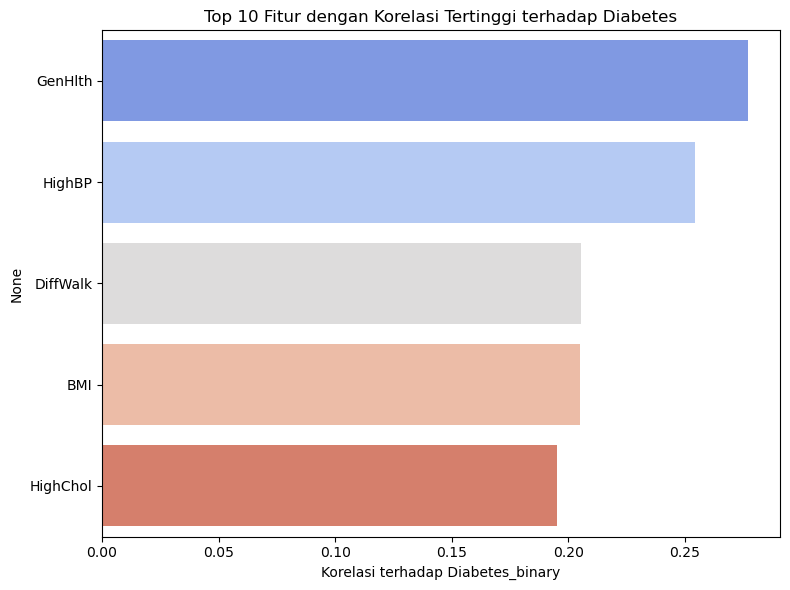

In [36]:
# 1. Apa saja faktor gaya hidup dan kesehatan yang paling berhubungan dengan diabetes berdasarkan dataset ini?
correlation = data_EDA.corr()
cor_target = correlation['Diabetes_binary'].sort_values(ascending=False)
top_corr_features = cor_target.drop('Diabetes_binary').head(5)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette='coolwarm')
plt.title('Top 10 Fitur dengan Korelasi Tertinggi terhadap Diabetes')
plt.xlabel('Korelasi terhadap Diabetes_binary')
plt.tight_layout()
plt.show()

Dari plot, faktor-faktor yang paling berhubungan dengan diabetes dapat dikelompokkan ke dalam faktor gaya hidup dan kesehatan:

Faktor Gaya Hidup:

1. BMI (Indeks Massa Tubuh): BMI tinggi (obesitas) adalah faktor gaya hidup utama yang berkorelasi dengan diabetes. Ini terkait dengan pola makan yang tidak sehat dan kurangnya aktivitas fisik.
2. DiffWalk (Kesulitan Berjalan): Kesulitan berjalan sering kali mencerminkan kurangnya aktivitas fisik, yang merupakan faktor risiko diabetes tipe 2 karena aktivitas fisik rendah dapat menyebabkan resistensi insulin.</br>

Faktor Kesehatan:

1. GenHlth (Kesehatan Umum): Persepsi kesehatan yang buruk sering kali mencerminkan kondisi kesehatan keseluruhan yang buruk, termasuk diabetes.
2. HighBP (Tekanan Darah Tinggi): Hipertensi sering terjadi bersamaan dengan diabetes, karena keduanya berbagi faktor risiko seperti obesitas dan resistensi insulin.
3. HighChol (Kolesterol Tinggi): Kolesterol tinggi sering dikaitkan dengan diabetes karena seseorang yang mengidap diabetes memiliki risiko untuk mengalami masalah kolesterol, meski sudah benar-benar memperhatikan glukosa di dalam darah. Gangguan kolesterol ini dapat meningkatkan risiko aterosklerosis dan masalah kardiovaskular lainnya yang mungkin saja membahayakan.(source: https://www.halodoc.com/artikel/cara-mengelola-kolesterol-tinggi-untuk-pengidap-diabetes)

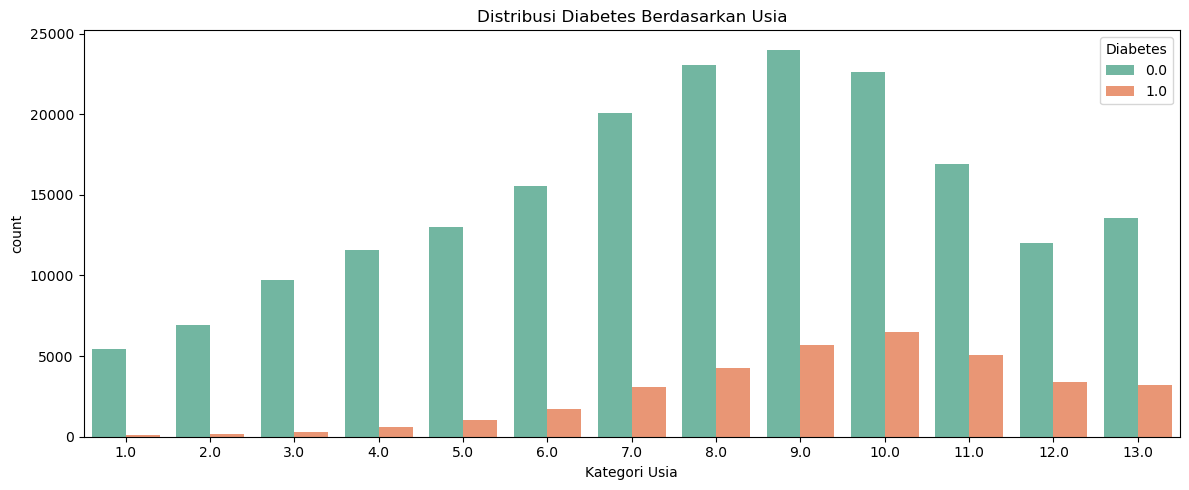

In [37]:
#2. Siapa yang lebih mungkin terkena diabetes berdasarkan faktor usia?
plt.figure(figsize=(12, 5))
sns.countplot(data=data_EDA, x='Age', hue='Diabetes_binary', palette='Set2')
plt.title('Distribusi Diabetes Berdasarkan Usia')
plt.xlabel('Kategori Usia')
plt.legend(title='Diabetes')
plt.tight_layout()
plt.show()

Plot histogram di atas menunjukkan distribusi diabetes berdasarkan kategori usia. Sumbu X menunjukkan kategori usia (dari 1 hingga 13, yang mewakili rentang usia, 1 = 18-24 tahun, 7 = 50-54 tahun, dan 13 = 80+ tahun), dan sumbu Y menunjukkan jumlah responden. Warna hijau mewakili responden tanpa diabetes 0, dan warna oranye mewakili responden dengan diabetes 1.

Dari plot, terlihat bahwa dari populasi responden besarnya resiko terkena diabetes akan meningkat seiring bertambahnya umur. dan kelompok usia yang memilki resiko tertinggi ada di kelompok 10 yang mewakilkan kelompok usia 65-69 tahun. hal ini didukung dari salah satu artikel yang menjelaskan bahwa " Berdasarkan kelompok usia, penderita diabetes paling banyak berada pada rentang usia 55–74 tahun. Meski demikian, penyakit ini juga dialami oleh orang muda di usia 20-an hingga 40-an" (source:https://www.alodokter.com/ketahui-faktor-risiko-diabetes-dan-cara-mengendalikannya#:~:text=Berdasarkan%20kelompok%20usia%2C%20penderita%20diabetes,%2Dan%20hingga%2040%2Dan.)

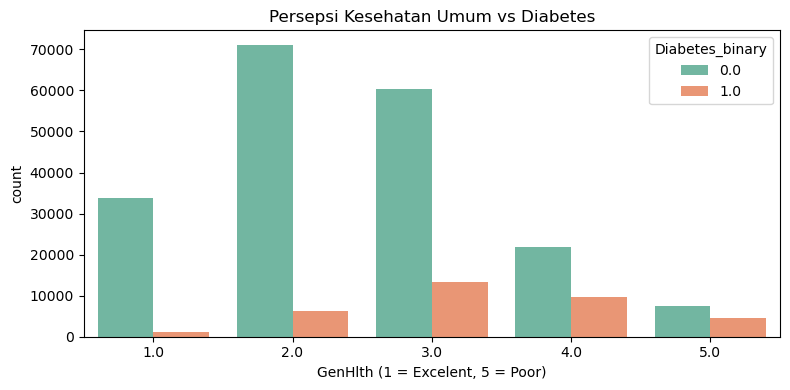

In [39]:
#3. Bagaimana distribusi diabetes dari sisi general health?
plt.figure(figsize=(8, 4))
sns.countplot(data=data_EDA, x='GenHlth', hue='Diabetes_binary', palette='Set2')
plt.title('Persepsi Kesehatan Umum vs Diabetes')
plt.xlabel('GenHlth (1 = Excelent, 5 = Poor)')
plt.tight_layout()
plt.show()

Plot histogram di atas menunjukkan distribusi kesehatan umum responden (GenHlth) terhadap status diabetes (Diabetes_binary). Sumbu X menunjukkan skala GenHlth (1 = Excelent , 5 = Poor), dan sumbu Y menunjukkan jumlah responden. Warna hijau mewakili responden tanpa diabetes 0, dan warna oranye mewakili responden dengan diabetes 1.

responden dengan kesehatan secara umum yang lebih baik (GenHlth 1-2) cenderung tidak memiliki diabetes. Sebaliknya, responden dengandengan kesehatan secara umum yang lebih buruk (GenHlth 3-5) memiliki kemungkinan lebih tinggi untuk memiliki diabetes.

C:\Users\Bardays\AppData\Local\Temp\ipykernel_17884\3516928264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_EDA, x='Diabetes_binary', y='PhysHlth', palette='Set2')


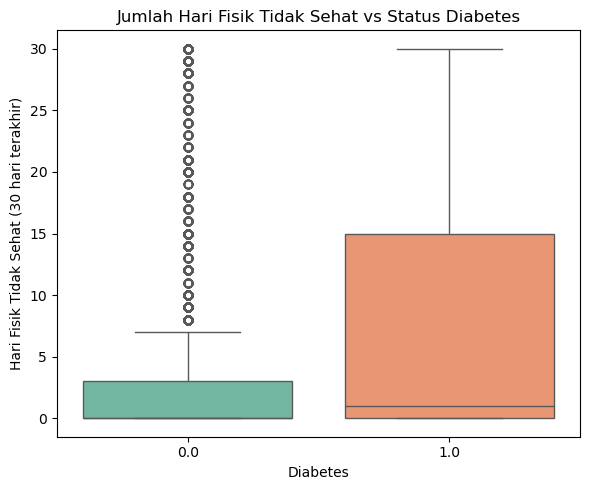

In [40]:
#4. Mengapa individu dengan kesehatan fisik rendah menunjukkan risiko diabetes lebih tinggi?
plt.figure(figsize=(6, 5))
sns.boxplot(data=data_EDA, x='Diabetes_binary', y='PhysHlth', palette='Set2')
plt.title('Jumlah Hari Fisik Tidak Sehat vs Status Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Hari Fisik Tidak Sehat (30 hari terakhir)')
plt.tight_layout()
plt.show()

In [41]:
df.groupby('Diabetes_binary')['PhysHlth'].describe()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,,,,,,,,
0.0,194377.0,4.080442,8.438609,0.0,0.0,0.0,3.0,30.0
1.0,35097.0,8.008491,11.320659,0.0,0.0,1.0,15.0,30.0


Dari plot, terlihat bahwa responden dengan diabetes 1 secara konsisten melaporkan lebih banyak hari fisik tidak sehat dibandingkan mereka yang tidak memiliki diabetes 0. Ini mengindikasikan adanya korelasi antara PhysHlth dan diabetes. Rata-rata responden yang mengalami diabetes mengalami kesehatan fisik rendah/sakit lebih dari 7 hari.

Responden dengan kesehatan fisik rendah menunjukkan risiko diabetes lebih tinggi karena keterbatasan tersebut sering kali mengurangi aktivitas fisik, yang merupakan faktor risiko utama diabetes. Selain itu, diabetes itu sendiri dapat memperparah keterbatasan fisik, menciptakan hubungan dua arah yang terlihat jelas pada plot ini.

## BAB 5 - Feature Engineering

### Handling Missing Value

In [13]:
#Cek Missing value pada dataset
df[df.isnull().any(axis=1)]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


Tidak terdapat missing value pada dataset

### Handling Outlier

In [14]:
df[non_cat].skew()

BMI         2.063475
MentHlth    2.544532
PhysHlth    2.044139
dtype: float64

Dari uji normalitas menggunakan skewness ketiga kolom numerik memiliki data yang skewed. Namun untuk kasus ini dikarenakan data yang digunakan merupakan sebuah data medis maka bisa dibilang outlier seperti BMI 98 atau poor Mental Health 30 hari bisa jadi valid dan memang terjadi. Oleh karena itu, untuk algoritma model seperti KNN dan SVM akan dilakukan capping karena kedua model tersebut menggunakan perhitungan jarak sehingga keberadaan outlier dapat mempengaruhi performa kedua model, dan untuk model decision tree, randomforest, dan boosting tidak terlalu bermasalah dengan adanya outlier sehingga untuk ketiga model tersebut akan dibiarkan. Untuk proses caping menggunakan winsorizer akan dilakukan di dalam pipeline.

### Split Train-Test data

In [15]:
#Split dataset X dan y
X = df.drop(columns='Diabetes_binary', axis=1)
y = df.Diabetes_binary

print(X.head())
print(y.head())

   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0           0.0     0.0      1.0  ...            1.0          0.0      5.0   
1           1.0     0.0      0.0  ...            0.0          1.0      3.0   
2           0.0     1.0      0.0  ...            1.0          1.0      5.0   
3           1.0     1.0      1.0  ...            1.0          0.0      2.0   
4           1.0     1.0      1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income 

In [16]:
#Split Train Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=13)
print(f'Train Size : {X_train.shape}')
print(f'Test Size : {X_test.shape}')
X_train.head()

Train Size : (183579, 21)
Test Size : (45895, 21)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
88884,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,6.0,6.0
127071,1.0,0.0,1.0,17.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,4.0,2.0,5.0,0.0,1.0,7.0,5.0,7.0
228947,0.0,1.0,1.0,51.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0
18430,0.0,1.0,1.0,32.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
19802,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,4.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0


### Feature Selection

Setelah melakukan train-test split selanjutnya akan dilakukan feature selection, tapi sebelumnya akan dilakukan uji korelasi untuk menentukan feature mana saja yang akan digunakan. Untuk target dengan nilai biner dengan feature yang memilki data numerik kontinu akan menggunakan point biserial correlation, untuk feature kategorikal akan menggunakan chi-square, dan untuk feature kategorikal yang bersifat ordinal akan menggunakan spearman untuk uji korelasinya.

In [17]:
#Uji korelasi dengan Point Biserial Correlation
results = []
for col in non_cat:  # your list of continuous feature names
    r, p = pointbiserialr(y_train, X_train[col])
    results.append((col, r, p))

# Convert to DataFrame for sorting or filtering
results_df = pd.DataFrame(results, columns=['Feature', 'Correlation', 'P-Value'])
results_df.sort_values(by='Correlation', key=abs, ascending=False, inplace=True)
results_df

,Feature,Correlation,P-Value
0,BMI,0.204976,0.000000e+00
2,PhysHlth,0.156824,0.000000e+00
1,MentHlth,0.054908,1.465463e-122


In [18]:
#Uji korelasi dengan Chi-Square dan Cramer's V
col_bin = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

results_cs = []
for i in col_bin:
  contingency_table = pd.crosstab(y_train,X_train[i])
  res = stats.chi2_contingency(contingency_table)
  chi2_stat, p_value, dof, expected = res

  n = contingency_table.sum().sum()
  min_dim = min(contingency_table.shape) - 1
  cramers_v = np.sqrt(chi2_stat / (n * min_dim))
  results_cs.append((i, round(cramers_v, 4), p_value))

# Convert to DataFrame for sorting or filtering
results_df_cs = pd.DataFrame(results_cs, columns=['Feature', 'Correlation', 'P-Value'])
results_df_cs.sort_values(by='Correlation', key=abs, ascending=False, inplace=True)
results_df_cs

,Feature,Correlation,P-Value
0,HighBP,0.2554,0.000000e+00
12,DiffWalk,0.2050,0.000000e+00
1,HighChol,0.1963,0.000000e+00
5,HeartDiseaseorAttack,0.1697,0.000000e+00
6,PhysActivity,0.0997,0.000000e+00
4,Stroke,0.0993,0.000000e+00
2,CholCheck,0.0722,2.466432e-210
9,HvyAlcoholConsump,0.0641,3.102471e-166
3,Smoker,0.0486,3.757003e-96
8,Veggies,0.0427,7.102797e-75


In [19]:
#Uji korelasi dengan Spearman
col_ord = ['GenHlth', 'Age', 'Education', 'Income']
results_sp = []
for cols in col_ord:  # your list of continuous feature names
    r, p = spearmanr(y_train, X_train[cols])
    results_sp.append((cols, r, p))

# Convert to DataFrame for sorting or filtering
results_df_sp = pd.DataFrame(results_sp, columns=['Feature', 'Correlation', 'P-Value'])
results_df_sp.sort_values(by='Correlation', key=abs, ascending=False, inplace=True)
results_df_sp

,Feature,Correlation,P-Value
0,GenHlth,0.273425,0.0
1,Age,0.174727,0.0
3,Income,-0.138713,0.0
2,Education,-0.096608,0.0


Dari hasil uji korelasi berdasarkan p-valuenya semua feature memiliki signifikance terhadap target, tapi tidak semua memiliki keterhubungan yang kuat. Bisa dilihat dari nilai korelasinya nilai terbesar 0.27 dan yang paling mendekati 0 ada di 0.017 dan hal ini wajar mengingat dataset yang terbilang besar juga. Untuk pemodelan kali ini saya hanya akan menggunakan feature dengan nilai korelasi > 0.1 dan < -0.1 dikarenakan menurut saya apabila mengambil feature dibawah 0.1 dan diatas -0.1 kekuatan hubungannya terlalu lemah.

In [20]:
#Drop kolom yang tidak digunankan
unused_col = ['CholCheck','Smoker', 'Stroke', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
              'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'Sex', 'Education']
X_train.drop(unused_col, axis=1, inplace=True)
X_test.drop(unused_col, axis=1, inplace=True)
X_train.head()

,HighBP,HighChol,BMI,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Income
88884,0.0,0.0,25.0,0.0,1.0,1.0,0.0,0.0,11.0,6.0
127071,1.0,0.0,17.0,0.0,1.0,4.0,5.0,0.0,7.0,7.0
228947,0.0,1.0,51.0,0.0,1.0,3.0,0.0,0.0,4.0,8.0
18430,0.0,1.0,32.0,0.0,1.0,2.0,0.0,0.0,9.0,8.0
19802,0.0,1.0,24.0,0.0,1.0,4.0,0.0,0.0,5.0,2.0


### Feature Scalling

>Dilakukan dalam pipeline</br>
>Feature kategorik tidak perlu melakukan encoding karena sudah numerik biner dan ordinal.

In [21]:
X_train.columns

Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'PhysActivity',
       'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income'],
      dtype='object')

## BAB 6 - Model Definition

In [22]:
#Define column for preprocessing
num = ['BMI', 'PhysHlth']
cat = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'PhysActivity',
       'GenHlth', 'DiffWalk', 'Age', 'Income']

In [23]:
#Define preprocessing steps
numeric_transformer_SVM_KNN = Pipeline(
    [("outlier", Winsorizer(capping_method='iqr', tail='right', fold=1.5)),
      ("scaler", MinMaxScaler())])

numeric_transformer = Pipeline(
    [("scaler", MinMaxScaler())])

preprocessor_SVM_KNN = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_SVM_KNN, num),
        ("cat", "passthrough", cat)
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num),
        ("cat", "passthrough", cat)
    ]
)


In [24]:
# Pipeline
pipeline_knn = Pipeline([
    ('preprocessor_SVM_KNN', preprocessor_SVM_KNN),
    ('knn', KNeighborsClassifier())
])

pipeline_DT = Pipeline([
    ('preprocessor', preprocessor),
    ('DT', DecisionTreeClassifier(random_state=13))
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=13))
])

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(eval_metric='aucpr', random_state=13))
])

## BAB 7 - Model Training

In [25]:
#Model Training KNN
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_SVM_KNN',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BMI', 'PhysHlth']),
                                                 ('cat', 'passthrough',
                                                  ['HighBP', 'HighChol',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'GenHlth',
                                                   'DiffWalk', 'Age',
                                                   'Income'])])),
                ('knn', KNeighborsClassifier())])

In [26]:
#Model Training Decision Tree
pipeline_DT.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BMI', 'PhysHlth']),
                                                 ('cat', 'passthrough',
                                                  ['HighBP', 'HighChol',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'GenHlth',
                                                   'DiffWalk', 'Age',
                                                   'Income'])])),
                ('DT', DecisionTreeClassifier(random_state=13))])

In [27]:
#Model Training RandomForest
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BMI', 'PhysHlth']),
                                                 ('cat', 'passthrough',
                                                  ['HighBP', 'HighChol',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'GenHlth',
                                                   'DiffWalk', 'Age',
                                                   'Income'])])),
                ('rf', RandomForestClassifier(random_state=13))])

In [28]:
#Model Training Xgboost
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BMI', 'PhysHlth']),
                                                 ('cat', 'passthrough',
                                                  ['HighBP', 'HighChol',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'GenHlth',
                                                   'DiffWalk', 'Age',
                                                   'Income'])])),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsam...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

## BAB 8 - Model Evaluation

In [29]:
# KNN train & test prediction evaluation
train_report_knn = classification_report(y_train, pipeline_knn.predict(X_train))
test_report_knn = classification_report(y_test, pipeline_knn.predict(X_test))
print(f'KNN Model Evaluation')
print('Train Evaluation')
print(train_report_knn)
print('Test Evaluation')
print(test_report_knn)

KNN Model Evaluation
Train Evaluation
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93    155501
         1.0       0.66      0.34      0.45     28078

    accuracy                           0.87    183579
   macro avg       0.78      0.66      0.69    183579
weighted avg       0.86      0.87      0.86    183579

Test Evaluation
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     38876
         1.0       0.40      0.19      0.26      7019

    accuracy                           0.83     45895
   macro avg       0.63      0.57      0.58     45895
weighted avg       0.80      0.83      0.81     45895



In [30]:
# Decision Tree train & test prediction evaluation
train_report_dt = classification_report(y_train, pipeline_DT.predict(X_train))
test_report_dt = classification_report(y_test, pipeline_DT.predict(X_test))
print(f'DT Model Evaluation')
print('Train Evaluation')
print(train_report_dt)
print('Test Evaluation')
print(test_report_dt)

DT Model Evaluation
Train Evaluation
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97    155501
         1.0       0.98      0.71      0.82     28078

    accuracy                           0.95    183579
   macro avg       0.96      0.85      0.90    183579
weighted avg       0.95      0.95      0.95    183579

Test Evaluation
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89     38876
         1.0       0.33      0.26      0.29      7019

    accuracy                           0.80     45895
   macro avg       0.60      0.58      0.59     45895
weighted avg       0.79      0.80      0.80     45895



In [31]:
# RandomForest train & test prediction evaluation
train_report_rf = classification_report(y_train, pipeline_rf.predict(X_train))
test_report_rf = classification_report(y_test, pipeline_rf.predict(X_test))
print(f'RF Model Evaluation')
print('Train Evaluation')
print(train_report_rf)
print('Test Evaluation')
print(test_report_rf)

RF Model Evaluation
Train Evaluation
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97    155501
         1.0       0.94      0.74      0.83     28078

    accuracy                           0.95    183579
   macro avg       0.95      0.87      0.90    183579
weighted avg       0.95      0.95      0.95    183579

Test Evaluation
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     38876
         1.0       0.40      0.21      0.28      7019

    accuracy                           0.83     45895
   macro avg       0.63      0.58      0.59     45895
weighted avg       0.80      0.83      0.81     45895



In [32]:
# XGBCLassifier train & test prediction evaluation
train_report_xgb = classification_report(y_train, pipeline_xgb.predict(X_train))
test_report_xgb = classification_report(y_test, pipeline_xgb.predict(X_test))
print(f'xgbclassifier Model Evaluation')
print('Train Evaluation')
print(train_report_xgb)
print('Test Evaluation')
print(test_report_xgb)

xgbclassifier Model Evaluation
Train Evaluation
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92    155501
         1.0       0.65      0.18      0.29     28078

    accuracy                           0.86    183579
   macro avg       0.76      0.58      0.61    183579
weighted avg       0.84      0.86      0.83    183579

Test Evaluation
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     38876
         1.0       0.56      0.16      0.24      7019

    accuracy                           0.85     45895
   macro avg       0.71      0.57      0.58     45895
weighted avg       0.82      0.85      0.81     45895



Dari hasil training data dengan model KNN, Decision Tree, RandomForest, dan XGBoost dapat dilihat bahwa hasilnya dari semua model yang diujikan relatif goodfit untuk class 0, namun untuk class 1 keempat model masih sangat overfit antara data train dan testnya dan cenderung pada data test class 1 sangat rendah skornya baik dari segi precision, recall, dan f1-score tapi utamanya pada recall karena untuk kasus data medis ini sangat penting untuk meminimalisir nilai False Negative. salah satu faktor yang dapat menyebabkan terjadinya hal ini dimana model masih sangat kurang baik dalam memprediksi class 1 adalah ketidakseimbangan proporsi data class 0 dan class 1 sehingga model dapat dengan baik mengenali dan memprediksi class 0 namun tidak dengan class 1. selanjutnya dilakukan cross validation utnuk menentukan model mana yang terbaik pada pengujian ini.

#### Cross Validate model

In [33]:
# checking cross validation score
cv_knn_model = cross_val_score(pipeline_knn, X_train, y_train, cv=5, scoring="recall")
cv_dt_model = cross_val_score(pipeline_DT, X_train, y_train, cv=5, scoring="recall")
cv_rf_model = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring="recall")
cv_xgb_model = cross_val_score(pipeline_xgb, X_train, y_train, cv=5, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_knn_model,cv_dt_model,cv_rf_model,cv_xgb_model],['knn_model','dt_model','rf_model','xgb_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

knn_model
recall - All - Cross Validation  :  [0.20569902 0.20459402 0.20975783 0.20975783 0.20178094]
recall - Mean - Cross Validation :  0.20631793019816175
recall - Std - Cross Validation  :  0.0030856136198630117
recall - Range of Test-Set       :  0.20323231657829874 - 0.20940354381802476
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.26874443 0.28222934 0.28062678 0.2872151  0.27319679]
recall - Mean - Cross Validation :  0.27840249078450324
recall - Std - Cross Validation  :  0.0065974491840803786
recall - Range of Test-Set       :  0.27180504160042285 - 0.28499993996858364
--------------------------------------------------
rf_model
recall - All - Cross Validation  :  [0.2160285  0.21848291 0.22097578 0.22667379 0.22600178]
recall - Mean - Cross Validation :  0.22163255093575668
recall - Std - Cross Validation  :  0.004153584053452924
recall - Range of Test-Set       :  0.21747896688230375 - 0.2257861349892096
-----------------

Dari hasi cross validation didapatkan model decision tree memiliki nilai recall pada test yang paling tinggi diantara keempat model yang diujikan dengan skor 0.27. Namun, skor 0.27 masih sangatlah kecil dan model masih dibilang masih tidak bagus. Selanjutnya akan dicoba bagaimana dengan model yang didalam pipelinenya ditambahkan data balancing menggunakan SMOTE.

### Dengan Data balancing

In [42]:
# Pipeline
pipeline_knn_b = Pipeline([
    ('preprocessor_SVM_KNN', preprocessor_SVM_KNN),
    ('smote', SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=13)),
    ('knn', KNeighborsClassifier())
])

pipeline_DT_b = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=13)),
    ('DT', DecisionTreeClassifier(random_state=13))
])

pipeline_rf_b = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=13)),
    ('rf', RandomForestClassifier(random_state=13))
])

pipeline_xgb_b = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=13)),
    ('xgb', XGBClassifier(eval_metric='aucpr', random_state=13))
])

In [43]:
#Model Training knn balanced
pipeline_knn_b.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_SVM_KNN',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BMI', 'PhysHlth']),
                                                 ('cat', 'passthrough',
                                                  ['HighBP', 'HighChol',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'GenHlth',
                                                   'DiffWalk', 'Age',
                                                   'Income'])])),
                ('smote', SMOTE(random_state=13, sampling_strategy='minority')),
                ('knn', KNeighborsClassifier())])

In [44]:
#Model Training Decision Tree Balanced
pipeline_DT_b.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BMI', 'PhysHlth']),
                                                 ('cat', 'passthrough',
                                                  ['HighBP', 'HighChol',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'GenHlth',
                                                   'DiffWalk', 'Age',
                                                   'Income'])])),
                ('smote', SMOTE(random_state=13, sampling_strategy='minority')),
                ('DT', DecisionTreeClassifier(random_state=13))])

In [45]:
#Model Training RandomForest balanced
pipeline_rf_b.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BMI', 'PhysHlth']),
                                                 ('cat', 'passthrough',
                                                  ['HighBP', 'HighChol',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'GenHlth',
                                                   'DiffWalk', 'Age',
                                                   'Income'])])),
                ('smote', SMOTE(random_state=13, sampling_strategy='minority')),
                ('rf', RandomForestClassifier(random_state=13))])

In [46]:
#Model Training Xgboost balanced
pipeline_xgb_b.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BMI', 'PhysHlth']),
                                                 ('cat', 'passthrough',
                                                  ['HighBP', 'HighChol',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'GenHlth',
                                                   'DiffWalk', 'Age',
                                                   'Income'])])),
                ('smote', SMOTE(random_state=13, sampling_strategy='minority')),
                ('xgb',
                 XGBClassifier(base_score=...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

### Evaluasi model dengan data balancing

In [47]:
# KNN balanced target train & test prediction evaluation
train_report_knn_b = classification_report(y_train, pipeline_knn_b.predict(X_train))
test_report_knn_b = classification_report(y_test, pipeline_knn_b.predict(X_test))
print(f'knn balanced Model Evaluation')
print('Train Evaluation')
print(train_report_knn_b)
print('Test Evaluation')
print(test_report_knn_b)

knn balanced Model Evaluation
Train Evaluation
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90    155501
         1.0       0.49      0.76      0.59     28078

    accuracy                           0.84    183579
   macro avg       0.72      0.81      0.75    183579
weighted avg       0.88      0.84      0.85    183579

Test Evaluation
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84     38876
         1.0       0.30      0.50      0.38      7019

    accuracy                           0.75     45895
   macro avg       0.60      0.65      0.61     45895
weighted avg       0.81      0.75      0.77     45895



In [48]:
# Decision Tree balanced target train & test prediction evaluation
train_report_DT_b = classification_report(y_train, pipeline_DT_b.predict(X_train))
test_report_DT_b = classification_report(y_test, pipeline_DT_b.predict(X_test))
print(f'DT balanced Model Evaluation')
print('Train Evaluation')
print(train_report_DT_b)
print('Test Evaluation')
print(test_report_DT_b)

DT balanced Model Evaluation
Train Evaluation
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    155501
         1.0       0.87      0.76      0.81     28078

    accuracy                           0.95    183579
   macro avg       0.91      0.87      0.89    183579
weighted avg       0.94      0.95      0.94    183579

Test Evaluation
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88     38876
         1.0       0.30      0.30      0.30      7019

    accuracy                           0.79     45895
   macro avg       0.59      0.59      0.59     45895
weighted avg       0.79      0.79      0.79     45895



In [49]:
# Randomforest train & test prediction evaluation
train_report_rf_b = classification_report(y_train, pipeline_rf_b.predict(X_train))
test_report_rf_b = classification_report(y_test, pipeline_rf_b.predict(X_test))
print(f'Randomforest balanced Model Evaluation')
print('Train Evaluation')
print(train_report_rf_b)
print('Test Evaluation')
print(test_report_rf_b)

Randomforest balanced Model Evaluation
Train Evaluation
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97    155501
         1.0       0.83      0.81      0.82     28078

    accuracy                           0.95    183579
   macro avg       0.90      0.89      0.89    183579
weighted avg       0.95      0.95      0.95    183579

Test Evaluation
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     38876
         1.0       0.35      0.35      0.35      7019

    accuracy                           0.80     45895
   macro avg       0.62      0.62      0.62     45895
weighted avg       0.80      0.80      0.80     45895



In [50]:
# XGBCLassifier train & test prediction evaluation
train_report_xgb_b = classification_report(y_train, pipeline_xgb_b.predict(X_train))
test_report_xgb_b = classification_report(y_test, pipeline_xgb_b.predict(X_test))
print(f'xgbclassifier balanced Model Evaluation')
print('Train Evaluation')
print(train_report_xgb_b)
print('Test Evaluation')
print(test_report_xgb_b)

xgbclassifier balanced Model Evaluation
Train Evaluation
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91    155501
         1.0       0.47      0.36      0.41     28078

    accuracy                           0.84    183579
   macro avg       0.68      0.64      0.66    183579
weighted avg       0.82      0.84      0.83    183579

Test Evaluation
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90     38876
         1.0       0.44      0.33      0.37      7019

    accuracy                           0.83     45895
   macro avg       0.66      0.63      0.64     45895
weighted avg       0.82      0.83      0.82     45895



Setelah ditambahkan data balancing pada pipeline masing-masing model terjadi peningkatan nilai recall secara keseluruhan baik di data train dan test nilai f1-score juga naik. tapi sebenarnya saya masih janggal dengan jumlah support yang tidak berubah setelah dilakukan data balancing meskipun terjadi perubahan pada skor pada masing-masing model. dari segi skor recall dan f1-score masih menunjukkan adanya overfit antara data train dan test dari keempat model, tapi untuk model dengan XGboost meskipun nilai precision, recall dan f1-score pada train dan test terbilang kecil namun, model ini bisa dibilang goodfit antara data train dan testnya. selanjutnya dilakukan cross validation untuk dilihat masing-masing model bagaimana performanya ditiap split cross validationnya.

### Cross Validate model with balanced data

In [51]:
# checking cross validation score
cv_knn_model = cross_val_score(pipeline_knn_b, X_train, y_train, cv=5, scoring="recall")
cv_dt_model = cross_val_score(pipeline_DT_b, X_train, y_train, cv=5, scoring="recall")
cv_rf_model = cross_val_score(pipeline_rf_b, X_train, y_train, cv=5, scoring="recall")
cv_xgb_model = cross_val_score(pipeline_xgb_b, X_train, y_train, cv=5, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_knn_model,cv_dt_model,cv_rf_model,cv_xgb_model],['knn_model','dt_model','rf_model','xgb_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

knn_model
recall - All - Cross Validation  :  [0.49795191 0.51994302 0.5        0.52047721 0.5111309 ]
recall - Mean - Cross Validation :  0.5099006083623181
recall - Std - Cross Validation  :  0.00953961672561513
recall - Range of Test-Set       :  0.500360991636703 - 0.5194402250879332
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.29634907 0.3019943  0.31623932 0.31071937 0.3079252 ]
recall - Mean - Cross Validation :  0.3066454513627265
recall - Std - Cross Validation  :  0.006898196902623803
recall - Range of Test-Set       :  0.2997472544601027 - 0.31354364826535025
--------------------------------------------------
rf_model
recall - All - Cross Validation  :  [0.3460374  0.3525641  0.34935897 0.36360399 0.3492431 ]
recall - Mean - Cross Validation :  0.35216151283827146
recall - Std - Cross Validation  :  0.006082243871350594
recall - Range of Test-Set       :  0.34607926896692087 - 0.35824375670962205
-------------------------

Kalau berdasarkan skor recall best model untuk cross validation adalah KNN karena memiliki nilai recall pada data test tertinggi diantara model lainnya. Namun, saya melihat XGBoost sebagai model yang lebih goodfit dan performanya pada cross validation juga bisa dibilang konsisten pada kelima CV. oleh karena itu saya akan menggunakan XGBoost untuk melakukan hyperparameter tuning.

### Hyperparameter Tuning

In [52]:
# Handle imbalance data
scale = sum(y_train == 0) / sum(y_train == 1)
#Classifier
xgb_c = XGBClassifier(
    objective='binary:logistic',
    # scale_pos_weight=scale,
    eval_metric='aucpr',
    random_state=13
)
#Make Pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=13)),
    ('xgb_c',xgb_c)
])
#set parameter
param_rand = {
    'xgb_c__n_estimators': [100, 200, 300],
    'xgb_c__max_depth': [3, 5, 7, 9],
    'xgb_c__learning_rate': [0.01,0.05, 0.1,0.2],
    'xgb_c__subsample': [0.8, 1.0],
    'xgb_c__colsample_bytree': [0.8, 1.0],
}
# Scorer for imbalanced classification
f1_s = make_scorer(f1_score, average='binary')

In [53]:
#Train randomsearch
rand_search = RandomizedSearchCV(xgb_pipeline, param_distributions=param_rand,
                                 n_iter=50, cv=5,
                                  random_state= 13, n_jobs=1,
                                   verbose=1, scoring=f1_s)
rand_search.fit(X_train, y_train)

print("Best parameters:", rand_search.best_params_)
print("Best score:", rand_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'xgb_c__subsample': 0.8, 'xgb_c__n_estimators': 100, 'xgb_c__max_depth': 5, 'xgb_c__learning_rate': 0.05, 'xgb_c__colsample_bytree': 0.8}
Best score: 0.46060469492348377


In [54]:
#Gunakan best estimator
xgb_randcv_best = rand_search.best_estimator_

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.81      0.86    155501
         1.0       0.37      0.62      0.46     28078

    accuracy                           0.78    183579
   macro avg       0.65      0.72      0.66    183579
weighted avg       0.84      0.78      0.80    183579
 

Confusion Matrix      : 


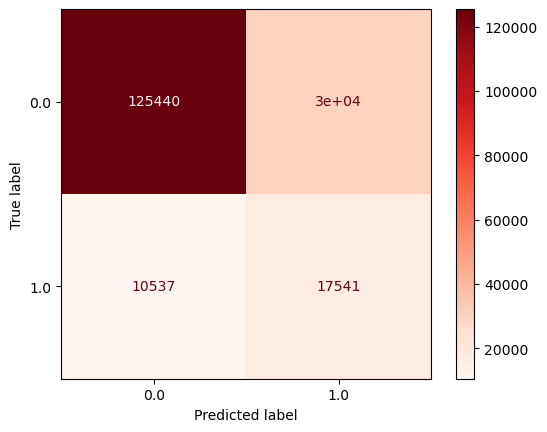

In [55]:
y_pred_train = xgb_randcv_best.predict(X_train)
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_randcv_best, X_train, y_train, cmap='Reds'))

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.80      0.86     38876
         1.0       0.36      0.62      0.46      7019

    accuracy                           0.77     45895
   macro avg       0.64      0.71      0.66     45895
weighted avg       0.83      0.77      0.80     45895
 

Confusion Matrix      : 


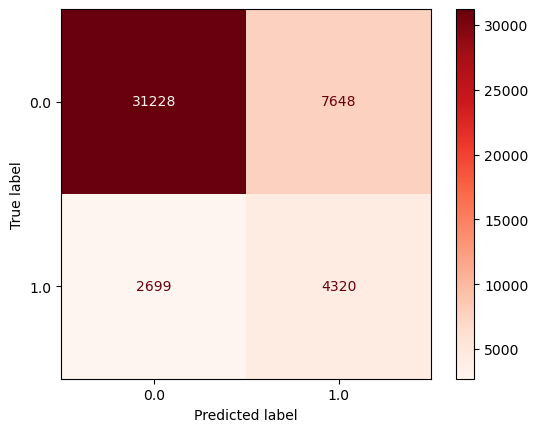

In [56]:
y_pred_test = xgb_randcv_best.predict(X_test)

print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_randcv_best, X_test, y_test, cmap='Reds'))

Model sebelum tuning punya akurasi 83%, bagus di class 0 tapi kurang di class 1 (presisi rendah, recall sangat rendah). Setelah tuning, akurasi turun jadi 77%. class 0 jadi lebih presisi tapi recall-nya turun. Perubahan terbesar di class 1: presisi turun tapi recall naik menjadi 62%. Karena prioritas model ini adalah minimalkan false negative, model setelah tuning lebih baik karena jauh lebih sensitif dalam mendeteksi class 1, meskipun konsekuensinya lebih banyak salah prediksi positif.
Metrik seperti precision, recall, dan F1-score untuk kedua class hampir sama di data train dan test. Ini adalah indikasi yang baik bahwa model yang telah dilakukan hyperparameter tuning dapat melakukan generalisasi dengan baik ke data yang belum pernah dilihat (data test).

## BAB 9 - Model Saving

In [57]:
#Save prefered Model
joblib.dump(xgb_randcv_best, 'best_xgb_pipeline.pkl')

['best_xgb_pipeline.pkl']

## BAB 10 - Model Inference

> Di file P1M2_Inf_Dais.ipynb


## BAB 11 - Conclusions

Pada project ini dilakukan analisa dan pembuatan model machine learning dari data Diabetes Health Indicators Dataset untuk memprediksi apakah user tergolong sebagai penderita diabetes atau bukan dengan menggunakan algoritma KNN, Decision Tree, Random Forest, XGBoost dan model evaluation menggunakan recall dan f1-score. dari seluruh rangakaian kegiatan yang sudah dilakukan dapat ditarik kesimpulan sebagai berikut:

* Keempat model bisa dengan sangat baik mengidentifikasi maupun memprediksi untuk class 0, namun sebaliknya saat mencoba untuk mengidentifikasi class 1 model masih cukup kesulitan. Hal ini terjadi kemungkinan karena imbalance data yang signifikan antara class 0 dan class 1. model KNN, Decission Tree dan Randomforest masih overfit antara data train dan testnya, sedangkan XGBoost sudah mendekati goodfit namun skor masih rendah.

*   Model setelah dilakukan balancing pada pipeline membuat algoritma XGBoost memiliki performa yang lebih baik dari KNN, Decision Tree, dan Random Forest dari hasil evaluasi metrik yang menunjukan peforma di data train dan data test yang terbilang goodfit dengan score yang meningkat juga. Meskipun dari segi score KNN lebih unggul tapi model KNN masih Overfit.

*   Setelah dilakukan tuning Hyperparameter terjadi perubhahan nilai recall pada class 1 yang cukup signifikan dari 0.33 menjadi 0.62 dan dikarenakan prioritas model ini adalah minimalkan false negative, model setelah tuning lebih baik karena jauh lebih sensitif dalam mendeteksi class 1.
  
*   Model belum bisa menghasilkan prediksi > 70% akurasi

*   Pada data inference model sudah bisa mengklasifikasikan hasil prediksi berdasarkan input data baru.

**For further improvement**:
*   Bisa dicoba data balancing diluar pipeline karena dari apa yang dilakukan pada project ini saya melihat tidak ada perubahan komposisi data class 0 dan class 1 pada saat evaluasi namun score tetap meningkat.

*   Melakukan Hyperparameter tuning lebih detail bisa membuka peluang untuk meningkatkan score evaluasi model, dan bisa lebih dipahami terlebih dahulu maksut dari hyperparameter yang akan digunakan.


### Kesimpulan EDA

* Kombinasi antara gaya hidup tidak sehat dan kondisi medis yang tidak dikelola dengan baik meningkatkan risiko terkena diabetes. Fokus pada perubahan gaya hidup dan kontrol kesehatan dasar dapat membantu mencegah atau mengelola diabetes.
* Usia merupakan salah satu faktor risiko utama Oleh karena itu, intervensi pencegahan dini pada usia muda sangat penting, serta pengelolaan ketat pada usia lanjut menjadi penting untuk menghindari komplikasi.
* Kondisi kesehatan seseorang secara umum bisa menjadi indikator apakah seseorang berpotensi terkena diabetes atau tidak, sehingga cukup penting untuk melakukan check up rutin utnuk mengetahui kondisi tubuh.
* Indikator jumlah hari tubuh terasa tidak sehat bisa juga menjadi penanda resiko awal diabetes.

## BAB 12 : Conceptual Problems

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !</br>
   Bagging adalah singkatan dari Bootstrap AGGregating. bagging mendapatkan namanya karena dia menggabungkan antara Bootstrapping dan Aggregation untuk membuat satu model ensemble.
   Pada Bagging beberapa model di-train secara independen pada subset training data yang berbeda, yang biasanya diperoleh melalui bootstrapping. Hasil prediksi dari riap model kemudian digabungkan dan diambil rata-ratanya (kasus regresi), atau mengambil voting mayoritas (kasus klasifikasi).


2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !</br>  

**Random Forest**:
* Menggunakan Bagging (Bootsrap Aggregating).
* Membangun banyak pohon secara paralel (Independen satu sama lain).
* Setiap pohon dilatih dari subset acak data.
* Hasil prediksi diambil dari voting mayoritas untuk kasus klasifikasi dan pengambilan rata-rata tiap pohon untuk regresi.</br>
  
**XGBoost**:
* Menggunakan Boosting, gradient boosting lebih tepatnya.
* Membangun pohon secara sekuensial.
* Setiap pohon baru berfokus untuk memperbaiki pohon sebelumnya.
* Hasil akhirnya merupakan kombinasi dari semua pohon.

3. Jelaskan apa yang dimaksud dengan Cross Validation !</br>
   Cross validation adalah teknik evaluasi model yang digunakan untuk mengestimasi performa model pada data yang belum dilihat (data non-train). Cara Cross validation menilai performa model adalah dengan menghitung metrik evaluasi (seperti akurasi, precision, recall, F1-score, RMSE, dll) pada setiap fold dan kemudian merata-ratakan hasilnya.